In [100]:
%matplotlib inline
import pandas as pd
import pyfolio as pf
import empyrical as em
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

In [20]:
TSMOM = {}
CSMOM = {}
data = Path('../data/out')
TSMOMPATH = data / 'TSMOM'
CSMOMPATH = data / 'CSMOM'

In [22]:
for x in TSMOMPATH.iterdir():
   TSMOM[x.name[:-7]] = pd.read_pickle(x)

In [25]:
for x in CSMOMPATH.iterdir():
   CSMOM[x.name[:-7]] = pd.read_pickle(x)

In [26]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(TSMOM['TSMOM_L_12_1'])

In [32]:
monthly = em.aggregate_returns(returns, 'monthly')

In [34]:
avg = monthly.mean()

In [35]:
avg

0.003347153935138388

In [37]:
TSMOM_MONTHLY = {}
for k, x in TSMOM.items():
    rets, pos, txn = pf.utils.extract_rets_pos_txn_from_zipline(x)
    TSMOM_MONTHLY[k] = rets

In [41]:
TSMOM_RETS_DF = pd.DataFrame(data=TSMOM_MONTHLY)

In [43]:
TSMOM_MONTHLY_DF = TSMOM_RETS_DF.apply(em.aggregate_returns, convert_to='monthly')

In [46]:
TSMOM_MONTHLY_AVG_DF = TSMOM_MONTHLY_DF.mean()

In [98]:
TSMOM_MONTHLY_AVG_DF

TSMOM_L_12_1       0.003347
TSMOM_L_12_12      0.006914
TSMOM_L_12_3       0.005389
TSMOM_L_12_6       0.005322
TSMOM_L_12_9       0.006001
TSMOM_L_1_1        0.001169
TSMOM_L_1_12       0.003232
TSMOM_L_1_3        0.003260
TSMOM_L_1_6        0.001170
TSMOM_L_1_9        0.003590
TSMOM_L_3_1        0.001304
TSMOM_L_3_12       0.004390
TSMOM_L_3_3        0.003705
TSMOM_L_3_6        0.004426
TSMOM_L_3_9        0.004739
TSMOM_L_6_1        0.001813
TSMOM_L_6_12       0.003988
TSMOM_L_6_3        0.004334
TSMOM_L_6_6        0.004550
TSMOM_L_6_9        0.006698
TSMOM_L_9_1        0.003029
TSMOM_L_9_12       0.004920
TSMOM_L_9_3        0.005174
TSMOM_L_9_6        0.005713
TSMOM_L_9_9        0.007133
TSMOM_L_S_12_1    -0.002741
TSMOM_L_S_12_12    0.006003
TSMOM_L_S_12_3     0.003306
TSMOM_L_S_12_6     0.003262
TSMOM_L_S_12_9     0.004203
                     ...   
TSMOM_L_S_9_1     -0.003038
TSMOM_L_S_9_12     0.001858
TSMOM_L_S_9_3      0.003209
TSMOM_L_S_9_6      0.004085
TSMOM_L_S_9_9      0

In [57]:
TSMOM_M_M_R = TSMOM_MONTHLY_AVG_DF.to_frame(name='m_m_r').sort_values(by='m_m_r')

In [69]:
TSMOM_M_M_R_I = TSMOM_M_M_R.reset_index()

In [94]:
TSMOM_M_M_R_I['J'] = TSMOM_M_M_R_I['index'].str.split('_').str[-2].astype(int)

In [95]:
TSMOM_M_M_R_I['K'] = TSMOM_M_M_R_I['index'].str.split('_').str[-1].astype(int)

In [134]:
TSMOM_M_M_R_I['B_S'] = TSMOM_M_M_R_I['index'].str[6:].str.split('_').str[:-2].str.join('_')

In [135]:
TSMOM_M_M_R_I

,index,m_m_r,J,K,B_S
0,TSMOM_S_1_6,-0.007073,1,6,S
1,TSMOM_S_6_1,-0.007026,6,1,S
2,TSMOM_S_3_1,-0.006341,3,1,S
3,TSMOM_S_9_1,-0.006213,9,1,S
4,TSMOM_S_12_1,-0.006122,12,1,S
5,TSMOM_S_1_12,-0.005839,1,12,S
6,TSMOM_S_1_1,-0.005726,1,1,S
7,TSMOM_L_S_1_6,-0.005618,1,6,L_S
8,TSMOM_L_S_6_1,-0.005272,6,1,L_S
9,TSMOM_L_S_3_1,-0.005152,3,1,L_S


In [107]:
TSMOM_M_M_R_I

,index,m_m_r,J,K
0,TSMOM_S_1_6,-0.007073,1,6
1,TSMOM_S_6_1,-0.007026,6,1
2,TSMOM_S_3_1,-0.006341,3,1
3,TSMOM_S_9_1,-0.006213,9,1
4,TSMOM_S_12_1,-0.006122,12,1
5,TSMOM_S_1_12,-0.005839,1,12
6,TSMOM_S_1_1,-0.005726,1,1
7,TSMOM_L_S_1_6,-0.005618,1,6
8,TSMOM_L_S_6_1,-0.005272,6,1
9,TSMOM_L_S_3_1,-0.005152,3,1


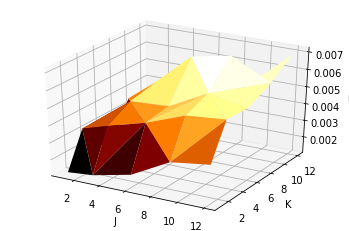

In [136]:
long_ts = TSMOM_M_M_R_I[TSMOM_M_M_R_I['B_S'] == 'L']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('J')
ax.set_ylabel('K')
ax.set_zlabel('r')
ax.plot_trisurf(long_ts['J'], long_ts['K'], long_ts['m_m_r'], cmap='afmhot')
plt.show()

In [ ]:
short_ts = TSMOM_M_M_R_I[TSMOM_M_M_R_I['B_S'] == 'S']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('J')
ax.set_ylabel('K')
ax.set_zlabel('r')
ax.plot_trisurf(short_ts['J'], short_ts['K'], short_ts['m_m_r'], cmap='afmhot')
plt.show()

In [ ]:
short_ts = TSMOM_M_M_R_I[TSMOM_M_M_R_I['B_S'] == 'L_S']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('J')
ax.set_ylabel('K')
ax.set_zlabel('r')
ax.plot_trisurf(short_ts['J'], short_ts['K'], short_ts['m_m_r'], cmap='afmhot')
plt.show()

In [ ]:
TSMOM_RETS_DF

In [ ]:
CSMOM_RETS = {}
for k, x in CSMOM.items():
    rets, pos, txn = pf.utils.extract_rets_pos_txn_from_zipline(x)
    CSMOM_RETS[k] = rets

In [ ]:
CSMOM_RETS

In [ ]:
CSMOM_RETS['CSMOM_L_S_3_3'].to_frame().apply(em.aggregate_returns, convert_to='monthly')

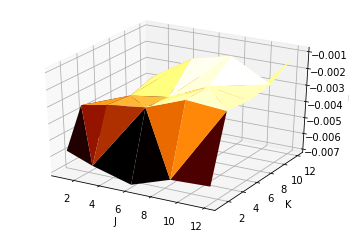

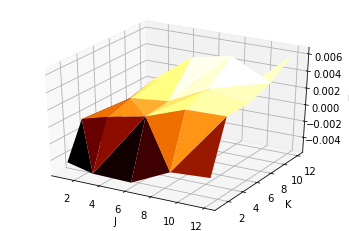

In [138]:
short_ts = TSMOM_M_M_R_I[TSMOM_M_M_R_I['B_S'] == 'L_S']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('J')
ax.set_ylabel('K')
ax.set_zlabel('r')
ax.plot_trisurf(short_ts['J'], short_ts['K'], short_ts['m_m_r'], cmap='afmhot')
plt.show()

In [139]:
TSMOM_RETS_DF

,TSMOM_L_12_1,TSMOM_L_12_12,TSMOM_L_12_3,TSMOM_L_12_6,TSMOM_L_12_9,TSMOM_L_1_1,TSMOM_L_1_12,TSMOM_L_1_3,TSMOM_L_1_6,TSMOM_L_1_9,...,TSMOM_S_6_1,TSMOM_S_6_12,TSMOM_S_6_3,TSMOM_S_6_6,TSMOM_S_6_9,TSMOM_S_9_1,TSMOM_S_9_12,TSMOM_S_9_3,TSMOM_S_9_6,TSMOM_S_9_9
2012-01-03 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-04 00:00:00+00:00,-0.000071,-0.000071,-0.000071,-0.000071,-0.000071,-0.000374,-0.000374,-0.000374,-0.000374,-0.000374,...,-0.006206,-0.006206,-0.006206,-0.006206,-0.006206,-0.006265,-0.006265,-0.006265,-0.006265,-0.006265
2012-01-05 00:00:00+00:00,0.000553,0.000553,0.000553,0.000553,0.000553,-0.000249,-0.000249,-0.000249,-0.000249,-0.000249,...,-0.000823,-0.000823,-0.000823,-0.000823,-0.000823,-0.000614,-0.000614,-0.000614,-0.000614,-0.000614
2012-01-06 00:00:00+00:00,0.000492,0.000492,0.000492,0.000492,0.000492,0.003389,0.003389,0.003389,0.003389,0.003389,...,-0.006133,-0.006133,-0.006133,-0.006133,-0.006133,-0.006119,-0.006119,-0.006119,-0.006119,-0.006119
2012-01-09 00:00:00+00:00,-0.000303,-0.000303,-0.000303,-0.000303,-0.000303,0.001677,0.001677,0.001677,0.001677,0.001677,...,-0.005650,-0.005650,-0.005650,-0.005650,-0.005650,-0.005668,-0.005668,-0.005668,-0.005668,-0.005668
2012-01-10 00:00:00+00:00,0.003230,0.003230,0.003230,0.003230,0.003230,0.006110,0.006110,0.006110,0.006110,0.006110,...,-0.009737,-0.009737,-0.009737,-0.009737,-0.009737,-0.009898,-0.009898,-0.009898,-0.009898,-0.009898
2012-01-11 00:00:00+00:00,-0.001426,-0.001426,-0.001426,-0.001426,-0.001426,-0.002552,-0.002552,-0.002552,-0.002552,-0.002552,...,0.003395,0.003395,0.003395,0.003395,0.003395,0.003957,0.003957,0.003957,0.003957,0.003957
2012-01-12 00:00:00+00:00,0.000108,0.000108,0.000108,0.000108,0.000108,0.001700,0.001700,0.001700,0.001700,0.001700,...,-0.002244,-0.002244,-0.002244,-0.002244,-0.002244,-0.002191,-0.002191,-0.002191,-0.002191,-0.002191
2012-01-13 00:00:00+00:00,0.001119,0.001119,0.001119,0.001119,0.001119,0.001093,0.001093,0.001093,0.001093,0.001093,...,0.000087,0.000087,0.000087,0.000087,0.000087,0.000670,0.000670,0.000670,0.000670,0.000670
2012-01-16 00:00:00+00:00,-0.000777,-0.000777,-0.000777,-0.000777,-0.000777,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.002034,0.002034,0.002034,0.002034,0.002034,0.002025,0.002025,0.002025,0.002025,0.002025


In [140]:
CSMOM_RETS = {}
for k, x in CSMOM.items():
    rets, pos, txn = pf.utils.extract_rets_pos_txn_from_zipline(x)
    CSMOM_RETS[k] = rets

In [141]:
CSMOM_RETS

{'CSMOM_L_12_1': 2012-01-03 00:00:00+00:00    0.000000
 2012-01-04 00:00:00+00:00   -0.000353
 2012-01-05 00:00:00+00:00    0.003239
 2012-01-06 00:00:00+00:00    0.001493
 2012-01-09 00:00:00+00:00    0.002796
 2012-01-10 00:00:00+00:00    0.015832
 2012-01-11 00:00:00+00:00   -0.008169
 2012-01-12 00:00:00+00:00   -0.000824
 2012-01-13 00:00:00+00:00    0.004571
 2012-01-16 00:00:00+00:00   -0.004056
 2012-01-17 00:00:00+00:00    0.008846
 2012-01-18 00:00:00+00:00    0.001068
 2012-01-19 00:00:00+00:00    0.011673
 2012-01-20 00:00:00+00:00   -0.001182
 2012-01-23 00:00:00+00:00    0.004101
 2012-01-24 00:00:00+00:00    0.003165
 2012-01-25 00:00:00+00:00    0.001260
 2012-01-26 00:00:00+00:00    0.005065
 2012-01-27 00:00:00+00:00   -0.007201
 2012-01-30 00:00:00+00:00   -0.008185
 2012-01-31 00:00:00+00:00    0.011306
 2012-02-01 00:00:00+00:00    0.000000
 2012-02-02 00:00:00+00:00   -0.000099
 2012-02-03 00:00:00+00:00    0.008460
 2012-02-06 00:00:00+00:00    0.007852
 2012-02-

In [147]:
CSMOM_RETS['CSMOM_L_S_3_3'].to_frame().apply(em.aggregate_returns, convert_to='monthly')

returns
2012 1  -0.011855
     2  -0.017837
     3   0.013954
     4  -0.002555
     5  -0.013875
     6   0.007158
     7   0.006219
     8  -0.026422
     9  -0.042201
     10 -0.018485
     11 -0.006018
     12 -0.023099
2013 1  -0.012195
     2  -0.009125
     3  -0.003501
     4   0.005709
     5  -0.010133
     6   0.003093
     7  -0.003090
     8  -0.031968
     9   0.008930
     10  0.009737
     11  0.015703
     12 -0.042849
2014 1  -0.038494
     2   0.019608
     3  -0.019818
     4  -0.003630
     5  -0.016607
     6  -0.006414
...           ...
2016 7  -0.011459
     8   0.009684
     9  -0.017332
     10 -0.004998
     11  0.008097
     12  0.020518
2017 1  -0.028898
     2  -0.025485
     3  -0.020844
     4  -0.003238
     5  -0.054793
     6  -0.059865
     7  -0.043730
     8   0.002555
     9  -0.004878
     10 -0.030645
     11 -0.030101
     12 -0.045242
2018 1  -0.001668
     2   0.002396
     3  -0.003926
     4  -0.003535
     5  -0.012135
     6  -0.017568
     7  -0.011873
     8  -0.018272
     9   0.006807
     10 -0.004475
     11 -0.019571
     12 -0.021084

[84 rows x 1 columns]